# Урок 2. Свёрточные нейронные сети (СНС)

## Домашнее задание

Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10
Библиотеки: [Python, Tensorflow]

### Подключение библиотек

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

### Загрузка и подготовка датасета CIFAR-10

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
train_x = train_x.astype(np.float32) / 255
test_x = test_x.astype(np.float32) / 255

train_y = np.reshape(train_y, (-1)).astype(np.int32)
test_y = np.reshape(test_y, (-1)).astype(np.int32)

In [6]:
print(train_x.shape, train_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_x.shape, test_x.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(50000,) int32
(10000, 32, 32, 3) float32
(10000,) int32


### Визуализация датасета CIFAR-10

In [10]:
some_samples = train_x[:15, ...]
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

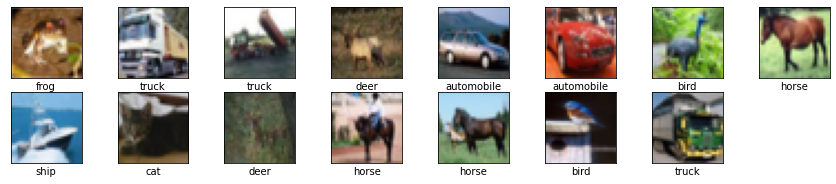

In [16]:
fig = plt.figure(figsize=(15, 6))
for j in range(some_samples.shape[0]):
  ax = fig.add_subplot(4, 8, j+1)
  ax.imshow(some_samples[j, :, :, :])
  plt.xticks([]), plt.yticks([])
  plt.xlabel(class_names[train_y[j]])

plt.show()

### Создание модели CNN

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Подготовка к обучению

In [18]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

### Обучение модели

In [20]:
NUM_EPOCHS = 10

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.9995 - accuracy: 0.6525
Epoch 2/10
1563/1563 [==============================] - 171s 109ms/step - loss: 0.9254 - accuracy: 0.6798
Epoch 3/10
1563/1563 [==============================] - 171s 110ms/step - loss: 0.8599 - accuracy: 0.7031
Epoch 4/10
1563/1563 [==============================] - 172s 110ms/step - loss: 0.7975 - accuracy: 0.7239
Epoch 5/10
1563/1563 [==============================] - 171s 110ms/step - loss: 0.7416 - accuracy: 0.7439
Epoch 6/10
1563/1563 [==============================] - 171s 110ms/step - loss: 0.6838 - accuracy: 0.7646
Epoch 7/10
1563/1563 [==============================] - 170s 109ms/step - loss: 0.6263 - accuracy: 0.7831
Epoch 8/10
1563/1563 [==============================] - 171s 110ms/step - loss: 0.5722 - accuracy: 0.8045
Epoch 9/10
1563/1563 [==============================] - 172s 110ms/step - loss: 0.5165 - accuracy: 0.8239
Epoch 10/10
1563/1563 [=======================

### Оценка качества модели

In [21]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 12s 37ms/step - loss: 0.9496 - accuracy: 0.7014


[0.9496239423751831, 0.7013999819755554]

### Пример инференса модели

In [22]:
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[5.4893317e-03 1.7254394e-03 3.5740857e-03 7.3466098e-01 1.2086560e-03
 2.4007076e-01 1.1326818e-02 2.7990836e-05 9.6612144e-04 9.4987045e-04], shape=(10,), dtype=float32)


### Функция для инференса и отображения результата предсказания

In [42]:
def test_image(sample):

  prediction = model(sample[None, ...])[0]
  ans = np.argmax(prediction)

  fig = plt.figure(figsize=(12, 4))

  ax = fig.add_subplot(1, 2, 1)
  ax.imshow(sample[:,:,0], cmap='gray')
  plt.xticks([]), plt.yticks([])

  ax = fig.add_subplot(1, 2, 2)
  bar_list = ax.bar(np.arange(10), prediction, align='center')
  bar_list[ans].set_color('g')
  ax.set_xticks(np.arange(10))
  ax.set_xlim([-1, 10])
  ax.grid(True)

  plt.show()

  print('Predictred: {}'.format(ans))

### Запуск предсказания для изображения случайной картинки из CIFAR-10

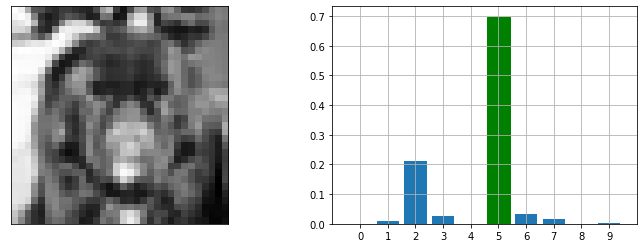

Predictred: 5
True Answer:dog


In [45]:
import random
idx = random.randint(0, test_x.shape[0])
sample = test_x[idx,...]
test_image(sample)

print(f'True Answer:{class_names[test_y[idx]]}')